#SHDOM single-scattering adjoint

This folder conatains the most recent (3 May 2015) single-scattering adjoint calculations from frank.  


>This has the log output files (.log), radiance output files (.arad),
and optical property adjoint files (.adj) for the "true" and "guess"
cases. The first set of output is for the single scattering forward radiance calculations

    >>les0822nh15t13y135_ocaer1_w0.646_ns1true.*,
    
    >>les0822nh15t13y135_ocaer1_w0.646_ns1guess.*,

>and the second set of outputs is for the full multiple scattering forward radiance calculations,

    >>les0822nh15t13y135_ocaer1_w0.646_ns1true2.*,

    >>les0822nh15t13y135_ocaer1_w0.646_ns1guess2.*.


The cloud field used in these simulations is a 2D slice taken at $y_{(i_y=135)}=8.375 \mathrm{km}$ of the 320x320 high resolution simulation shown below. 

![The Reflectance](../data-adjoint2/les0822nh15t13_aer008_w0.646a_idir01.jpg)

The adjoint calculation is for the gradient of the misfit function, 

\begin{align}
\frac{\partial \Phi(\sigma, \omega)}{\partial(\sigma)} &= \left< \Delta p, \mathcal{U}_{\sigma}[\Delta f] \right>
\end{align}

Only the first order of scattering completed so the results are approximate.  In the calculation labelled "1" the forward and adjoint calculations are only single-scattering.  In the calculation labelled "2", the Forward calculation includes multiple scatterng while the adjoint does not.  


In [15]:
%pylab inline

# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import pandas as pd



Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [16]:
# Utility functions

def print_head(fname, Nlines=10, indent="\t"):
    "Print the head of the file."
    
    # Print a message and then the first N lines
    print("Showing head: {}".format(fname))
    for i, line in zip(range(Nlines), open(fname, 'r')):
        print(indent + line.strip())
        
    print('\n')
    
def read_log(flog, start_line="X      Z   Extinct", max_lines=10**8):
    """
    Read in a log file but save lines only after reaching a line 
    matching start_line.
    """
    
    # Loop over lines record after header and before footer
    ncols = None 
    lines = []
    for i, line in zip(range(max_lines), open(flog, 'r')):
        new = line.strip().split()
        
        # Check if the line is the header
        if ncols is None:
            if line.strip()[:len(start_line)]==start_line:
                ncols = len(new[:9])
                cols = new[:9]
        else:        
            if ncols == len(new[:9]):
                lines.append(new[:9])
            else:
                print(new)
                break
    # Raise an error if the file had no line with the specified columns    
    if ncols is None: 
        raise ValueError("No column line found containing {}".format(start_line))
        
    # Make dictionary of arrays from keys array with given lines
    N = len(lines) - 1
    value_array = np.array(lines[:], dtype='f8')
    
    log_dict = dict(zip(cols, list(value_array.T)))
    return log_dict
    

In [17]:
ls

exploring_adjoint.ipynb
exploring_adjoint_with_aerosol.ipynb
les0822nh15t13y135_ocaer1_w0.646_ns1guess2.adj
les0822nh15t13y135_ocaer1_w0.646_ns1guess2.arad
les0822nh15t13y135_ocaer1_w0.646_ns1guess2.log
les0822nh15t13y135_ocaer1_w0.646_ns1true2.adj
les0822nh15t13y135_ocaer1_w0.646_ns1true2.arad
les0822nh15t13y135_ocaer1_w0.646_ns1true2.log
les0822nh15t13y135_w0.646_ns1guess2.adj
les0822nh15t13y135_w0.646_ns1guess2.arad
les0822nh15t13y135_w0.646_ns1guess2.log
les0822nh15t13y135_w0.646_ns1true2.adj
les0822nh15t13y135_w0.646_ns1true2.arad
les0822nh15t13y135_w0.646_ns1true2.log


# Looking at the data files

In [18]:
# The log file
flog = "les0822nh15t13y135_ocaer1_w0.646_ns1true2.log"
print_head(flog, Nlines=10)

# The radiance file
frad = "les0822nh15t13y135_ocaer1_w0.646_ns1true2.arad"
print_head(frad, Nlines=25)

# The adjoint file
fadj_true = "les0822nh15t13y135_ocaer1_w0.646_ns1true2.adj"
fadj = "les0822nh15t13y135_ocaer1_w0.646_ns1guess2.adj"

    
    
print_head(fadj, Nlines=5)

# The adjoint Radiance file
farad = "les0822nh15t13y135_ocaer1_w0.646_ns1guess2.arad"
farad_true = "les0822nh15t13y135_ocaer1_w0.646_ns1true2.arad"
print_head(farad, Nlines=35)

Showing head: les0822nh15t13y135_ocaer1_w0.646_ns1true2.log
	
	Name of this SHDOMADJ run:
	les0822nh15t13y135_ocaer1_w0.646_ns1true2
	Input particle properties filename (or NONE for Rayleigh only)
	les0822nh15t13y135_ocaer1t.part
	Number of input scattering tables
	2
	Name of each scattering table
	water_w0.646.scat
	aero_oc_w0.646.scat


Showing head: les0822nh15t13y135_ocaer1_w0.646_ns1true2.arad
	! Polarized Spherical Harmonic Discrete Ordinate Radiative Transfer Radiance Output
	!  L= 15  M= 15  NLM=  256   NMU= 16  NPHI= 32  NANG=  354   NSH=   3059599
	!  NSTOKES=1   NX= 320   NY=   1   NZ=  86    NPTS=   36912   NCELLS=   42822
	!  PARTICLE_FILE=les0822nh15t13y135_ocaer1t.part
	!  CORRELATED_K-DIST_FILE=NONE   NUM_G= 1
	!  SOURCE_TYPE=SOLAR               DELTA-M METHOD
	!  GRID_TYPE=EVEN (X,Y)    PROPERTY-FILE (Z)    INDEPENDENT_PIXEL=2
	!  SURFACE_TYPE=FIXED LAMBERTIAN         HORIZ_BOUNDARY_COND=0
	!  GROUND_ALBEDO=0.0500000  SKY_RAD= 0.00000E+00
	!  SOLAR_FLUX= 0.100000E+01  

In [19]:
pd.read_csv?

In [20]:
# Load the adjoint files into memory
adj_frame = pd.read_csv(fadj, quoting=3, delim_whitespace=True, skiprows=2)
adj_true_frame = pd.read_csv(fadj_true, quoting=3, delim_whitespace=True, skiprows=2)
adj_arad_frame = pd.read_csv(farad, quoting=3, delim_whitespace=True, skiprows=19)
adj_arad_true_frame = pd.read_csv(farad_true, quoting=3, delim_whitespace=True, skiprows=19)
    
    
# Get variables from the array
nx = adj_frame['X'].unique().size
nz = adj_frame["Z"].unique().size


# Get the guess case adjoint field properties
adj_x = np.array(adj_frame["X"], dtype='f8').reshape(nx, nz)
adj_z = np.array(adj_frame["Z"], dtype='f8').reshape(nx, nz)
adj_ext = np.array(adj_frame["Extinct"], dtype='f8').reshape(nx, nz)
adj_alb = np.array(adj_frame["SSalbedo"], dtype='f8').reshape(nx, nz)
adj_dMFdext = np.array(adj_frame["dMF/dExt"], dtype='f8').reshape(nx, nz)
adj_dMFdalb = np.array(adj_frame["dMF/dSSalb"], dtype='f8').reshape(nx, nz)

# Get the True case adjoint extinction field
adj_ext_true = np.array(adj_true_frame["Extinct"], dtype='f8').reshape(nx, nz) 

# Define the adjoint radiance parameters
adj_arad = np.array(adj_arad_frame['RADIANCE'], dtype='f8').reshape(nx)
adj_arad_true = np.array(adj_arad_true_frame['RADIANCE'], dtype='f8').reshape(nx)




In [21]:
# Plot uniformity parameters
H = 15.5   # top of the atmosphere plots

mask_clouds = (adj_ext>= .75e-5) #* (adj_z <= 2.83)
cloud_outline = (adj_ext>= .75e-1) #* (adj_z <= 2.83)


# Scaling of the verticle coordinate 

Zscale = adj_z[0,:]
DZscale = 0 * Zscale
DZscale_other = 0 * Zscale
DZscale[:-1] += 1 / (Zscale[1:] - Zscale[:-1])
DZscale_other[1:] += 1 / (Zscale[1:] - Zscale[:-1])

alpha = .99725
DZscale = alpha * DZscale + (1-alpha) * DZscale_other



# Compute the residual
adj_residual = adj_arad_true - adj_arad


#mask_clouds = adj_ext_true >= 1e-5


<matplotlib.colorbar.Colorbar instance at 0x9b0a200>

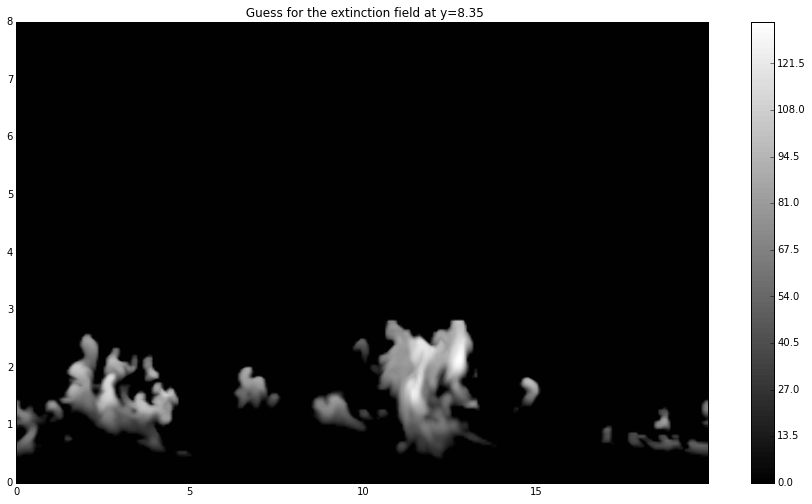

In [22]:
# Make a figure to plot the true extinction field
f0 = plt.figure(0, (15,8), facecolor='white')
ax0 = f0.add_axes([.1, .1, .8, .8])
contour0 = ax0.contourf(adj_x, adj_z, adj_ext_true, 100, cmap=cm.gray)
ax0.set_ybound((0,8))
ax0.set_title(" Guess for the extinction field at y=8.35")
f0.colorbar(contour0, ax=ax0)

<matplotlib.colorbar.Colorbar instance at 0x5e22b00>

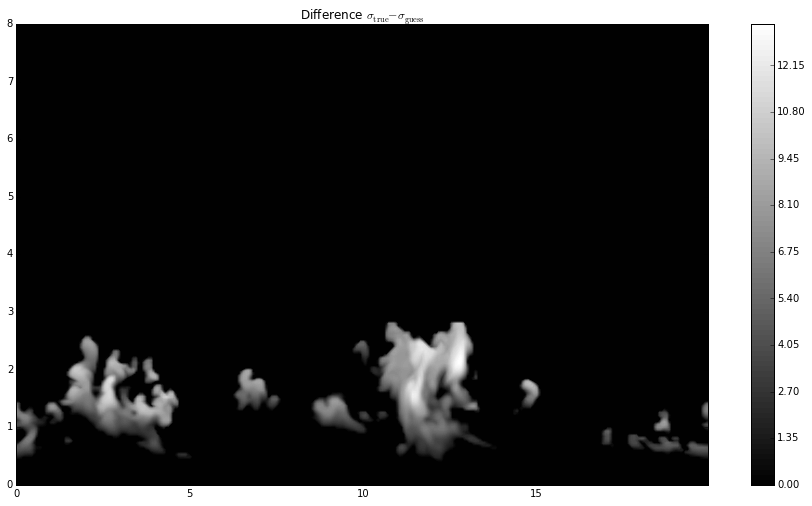

In [23]:
# Make a figure to plot the true extinction field
f0 = plt.figure(0, (15,8), facecolor='white')
ax0 = f0.add_axes([.1, .1, .8, .8])

fvals = adj_ext_true - adj_ext

contour0 = ax0.contourf(adj_x, adj_z, fvals, 100, cmap=cm.gray)
ax0.set_ybound((0,8))
ax0.set_title("Difference $\sigma_{\mathrm{true}} - \sigma_{\mathrm{guess}}$")
f0.colorbar(contour0, ax=ax0)

<matplotlib.colorbar.Colorbar instance at 0xc0bf3f8>

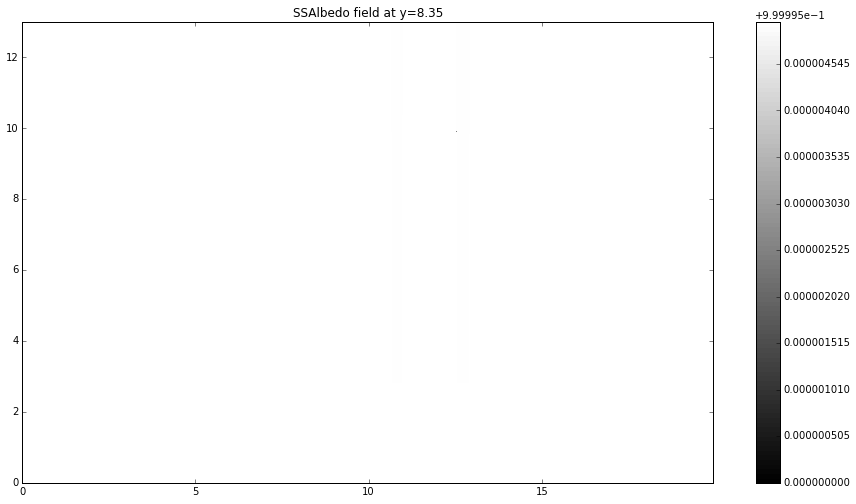

In [29]:
# Make a figure to plot the true single-scattering albedo field
f1 = plt.figure(1, (15,8), facecolor='white')
ax1 = f1.add_axes([.1, .1, .8, .8])


levels = np.linspace(.999995, 1, 100)
contour1 = ax1.contourf(adj_x, adj_z, adj_alb, levels=levels, cmap=cm.gray)
ax1.set_ybound((0,13))
ax1.set_title("SSAlbedo field at y=8.35")
f1.colorbar(contour1, ax=ax1)


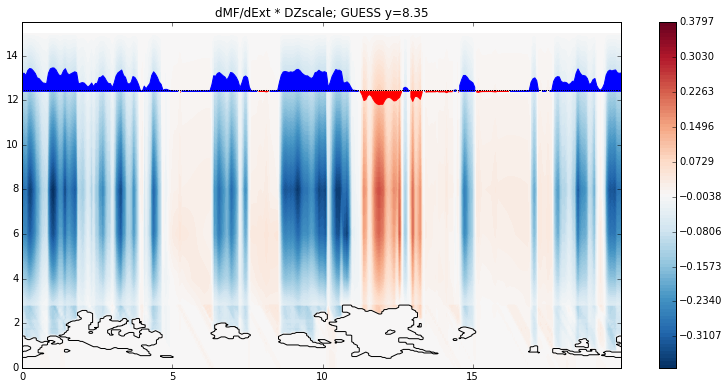

In [30]:
# Make a figure to plot the true single-scattering albedo field
f2 = plt.figure(1, (13,6), facecolor='white')
ax2 = f2.add_axes([.1, .1, .8, .8])


fvals = adj_dMFdext * mask_clouds * DZscale #* .1 * adj_ext
fmax = abs(fvals).max()
levels = np.linspace(-fmax, fmax, 100)
contour2 = ax2.contourf(adj_x, adj_z, fvals, levels=levels, cmap=cm.RdBu_r) #levels=linspace(-16, 16, 100),
contour2a = ax2.contour(adj_x, adj_z, cloud_outline, 1, cmap=cm.gray) #levels=linspace(-16, 16, 100),

# Add the residual to the plot
ftrans = lambda y: 100 * y + .8*H 
plot_overlay_origin = ftrans(0 * adj_residual)
plot_overlay_arad = ftrans(adj_residual)
plot_arad = ax2.fill_between(adj_x[:,0], plot_overlay_origin, plot_overlay_arad, 
                             where=(plot_overlay_origin<plot_overlay_arad), 
                             color='b')#, linewidth=3)
plot_arad = ax2.fill_between(adj_x[:,0], plot_overlay_origin, plot_overlay_arad, 
                             where=(plot_overlay_origin>plot_overlay_arad), 
                             color='r')#, linewidth=3)
plot_origin = ax2.plot(adj_x[:,0], plot_overlay_origin, 'k,', linewidth=1)
ax2.set_ybound((0,H))
ax2.set_title("dMF/dExt * DZscale; GUESS y=8.35")
cb = f2.colorbar(contour2, ax=ax2)
#cb.set_ticks([-2, -1, 0, 1, 2])
#cb.set_ticklabels(['-2', '-1', '0', '1', '2'])

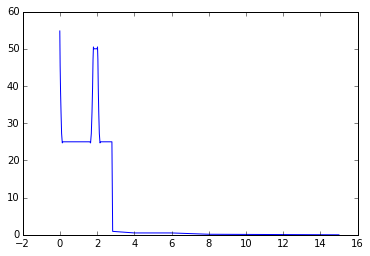

In [31]:
plot(Zscale, DZscale)

<matplotlib.colorbar.Colorbar instance at 0xb85cb5a8>

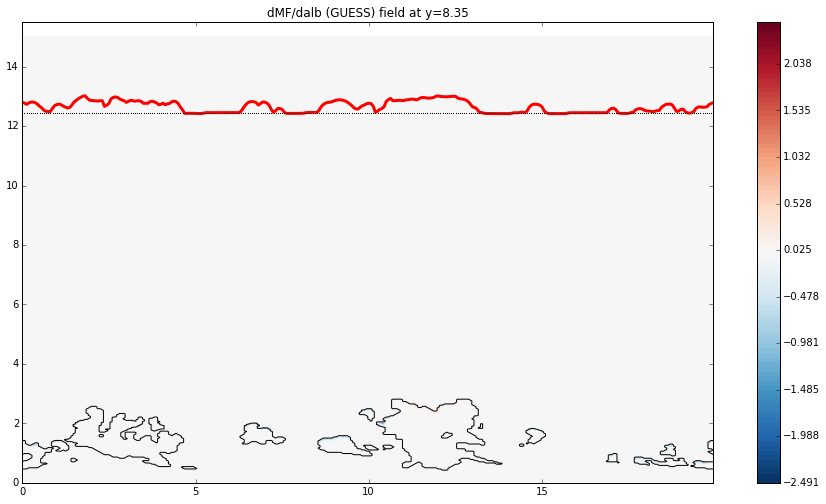

In [396]:
# Make a figure to plot the true single-scattering albedo field
f3 = plt.figure(1, (15,8), facecolor='white')
ax3 = f3.add_axes([.1, .1, .8, .8])


# plot parameters
fvals = adj_dMFdalb * mask_clouds * DZscale # * .1 * adj_ext
fmax = abs(fvals).max()
levels = np.linspace(-fmax, fmax, 100)



#levels = np.linspace(-.05, .05, 100)

#fvals = adj_dMFdalb * mask_clouds * DZscale





contour3 = ax3.contourf(adj_x, adj_z, fvals, levels=levels, cmap=cm.RdBu_r)
contour3a = ax3.contour(adj_x, adj_z, cloud_outline, 1, cmap=cm.gray) #levels=linspace(-16, 16, 100),

# Add the residual to the plot
ftrans = lambda y: 2. * y + .8*H 
plot_overlay_origin = ftrans(0 * adj_arad)
plot_overlay_arad = ftrans(adj_arad)

plot_arad = ax3.plot(adj_x[:,0], plot_overlay_arad, 'r', linewidth=3)
plot_origin = ax3.plot(adj_x[:,0], plot_overlay_origin, 'k,', linewidth=1)

ax3.set_ybound((0,H))
ax3.set_title("dMF/dalb (GUESS) field at y=8.35")

f3.colorbar(contour3, ax=ax3)

((320, 83), (320, 83), (320,))


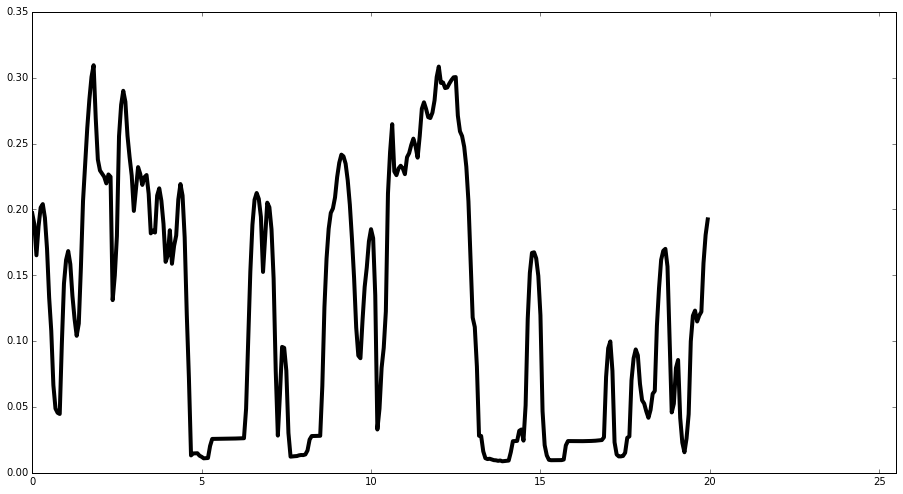

In [369]:
# Plot the Adjoint radiance at the top of the atmosphere
f4 = plt.figure(4, (15,8), facecolor='white')
ax4 = f4.add_axes([.1, .1, .8, .8])
ax4.plot(np.unique(adj_x), adj_arad, 'k', linewidth=4)
ax4.set_xbound(0,25.5)
#ax4.contourf(adj_x, adj_z, adj_arad, 100, cmap=cm.RdBu_r)
print(adj_x.shape, adj_z.shape, adj_arad.shape)



In [292]:
# Read the adjoint file

cols = ['X', 'Y', 'Z', 'ADEXTINCT', "ADALBEDO"]
value_list = []
for line in open(fadj):
    if line[0] =='!':
        pass
    else:
        new = line.strip().split()
        value_list.append(new[:len(cols)])
        
values = np.array(value_list, dtype="f8").T
adjoint_dict = dict(zip(cols, values))


ValueError: could not convert string to float: X

In [10]:
# Get values to plot
nx = np.unique(adjoint_dict['X']).size
nz = np.unique(adjoint_dict['Z']).size
x = adjoint_dict['X'].reshape(nx, nz)
z = adjoint_dict['Z'].reshape(nx, nz)
adj_ext = adjoint_dict['ADEXTINCT'].reshape(nx, nz)
adj_alb = adjoint_dict['ADALBEDO'].reshape(nx, nz)

print("maxes: {}, {}.".format(abs(adj_ext).max(),abs(adj_alb).max()))


maxes: 16.91, 0.501.


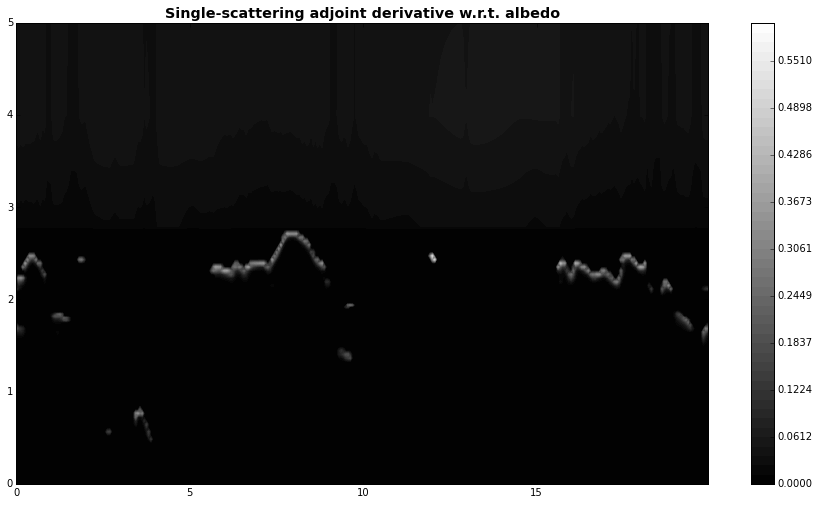

In [11]:
#plot the adjoint of the extinction
f1 = plt.figure(1, (15, 8), facecolor='white')
ax1 = f1.add_axes([.1, .1, .8, .8])
contour1 =ax1.contourf(x, z, adj_alb, levels=np.linspace(0, .6,50), cmap=cm.gray)
ax1.set_ybound(0,5)
f1.colorbar(contour1, ax=ax1)

ax1.set_title("Single-scattering adjoint derivative w.r.t. albedo", fontsize="x-large", fontweight="bold")

In [19]:
# The first adjoint radiance field
farad1 = "radobs_les0822nh15t13y89_ocaer1_w0.646_ns1ss1.arad"
print_head(farad1, Nlines=100)


Showing head: radobs_les0822nh15t13y89_ocaer1_w0.646_ns1ss1.arad
	! Polarized Spherical Harmonic Discrete Ordinate Radiative Transfer Radiance Output
	!  L= 15  M= 15  NLM=  256   NMU= 16  NPHI= 32  NANG=  354   NSH=   1757885
	!  NSTOKES=1   NX= 320   NY=   1   NZ=  85    NPTS=   27285   NCELLS=   26880
	!  PARTICLE_FILE=les0822nh15t13y89_ocaer1.part
	!  CORRELATED_K-DIST_FILE=NONE   NUM_G= 1
	!  SOURCE_TYPE=SOLAR               DELTA-M METHOD
	!  GRID_TYPE=EVEN (X,Y)    PROPERTY-FILE (Z)    INDEPENDENT_PIXEL=2
	!  SURFACE_TYPE=FIXED LAMBERTIAN         HORIZ_BOUNDARY_COND=0
	!  GROUND_ALBEDO=0.0500000  SKY_RAD= 0.00000E+00
	!  SOLAR_FLUX= 0.100000E+01   SOLAR_MU=-0.9221000   SOLAR_AZ= 339.400
	!  UNITS=WATTS/(M^2 MICRON STER)    WAVELENGTH=      0.65
	!  SPLITTING_ACCURACY= 0.300E-01   SPHERICAL_HARMONIC_ACCURACY= 0.300E-02
	!  SOLUTION_ACCURACY= 0.300E-04
	!  MAXIMUM_ITERATIONS=   0   NUMBER_ITERATIONS=   0
	!  RADIANCE AT Z= 15.000
	320    1    3 ! NXOUT, NYOUT, NRADDIR
	!  ID      m

In [13]:
# The second adjoint radiance field
farad2 = "radobs_les0822nh15t13y89_ocaer1_w0.646_ns1ss2.arad"
print_head(farad2)                


Showing head: radobs_les0822nh15t13y89_ocaer1_w0.646_ns1ss2.arad
	! Polarized Spherical Harmonic Discrete Ordinate Radiative Transfer Radiance Output
	!  L= 15  M= 15  NLM=  256   NMU= 16  NPHI= 32  NANG=  354   NSH=   2422485
	!  NSTOKES=1   NX= 320   NY=   1   NZ=  85    NPTS=   30052   NCELLS=   31290
	!  PARTICLE_FILE=les0822nh15t13y89_ocaer1.part
	!  CORRELATED_K-DIST_FILE=NONE   NUM_G= 1
	!  SOURCE_TYPE=SOLAR               DELTA-M METHOD
	!  GRID_TYPE=EVEN (X,Y)    PROPERTY-FILE (Z)    INDEPENDENT_PIXEL=2
	!  SURFACE_TYPE=FIXED LAMBERTIAN         HORIZ_BOUNDARY_COND=0
	!  GROUND_ALBEDO=0.0500000  SKY_RAD= 0.00000E+00
	!  SOLAR_FLUX= 0.100000E+01   SOLAR_MU=-0.9221000   SOLAR_AZ= 339.400




In [14]:
# A sample modis file
fmodis_blue = "les0822nh15t13_aer008_w0.646rad.modis"
print_head(fmodis_blue)

Showing head: les0822nh15t13_aer008_w0.646rad.modis
	40  40  23
	! Simulated MODIS reflectances from SHDOM radiance output
	! IA   Rad(1:Ncross)
	1 1.0000  0.00   0.00 20.000 20.000 ! idir, mu, theta, phi_shdom, size_cross, size_along
	1 0.0765 0.1141 0.2162 0.1455 0.1407 0.0961 0.0401 0.0496 0.0690 0.0696 0.0722 0.0709 0.0778 0.0677 0.0694 0.0692 0.0725 0.1055 0.0934 0.0724 0.0701 0.0680 0.0680 0.0679 0.0680 0.0682 0.0684 0.0691 0.0747 0.0888 0.1230 0.0937 0.1201 0.0896 0.0944 0.0857 0.0592 0.0672 0.0700 0.0722
	2 0.0702 0.0723 0.0972 0.0969 0.2869 0.2755 0.0567 0.0559 0.0687 0.0636 0.0761 0.0977 0.0996 0.1314 0.0961 0.0598 0.0686 0.0689 0.0840 0.0941 0.0648 0.0692 0.0710 0.0670 0.0679 0.0678 0.0682 0.0687 0.0697 0.0782 0.1025 0.0723 0.0575 0.0718 0.0841 0.0720 0.0803 0.0733 0.0694 0.0699
	3 0.0697 0.0700 0.0712 0.0723 0.1212 0.1625 0.0773 0.0977 0.0573 0.0622 0.0979 0.0866 0.1896 0.2539 0.1146 0.1198 0.1418 0.0673 0.0754 0.1100 0.0931 0.0671 0.0703 0.0683 0.0682 0.0679 0.0679 0.0683 

In [15]:
# Reflectance from the MODIS case, but at full 320 x 320 resolution 
fhres_blue = "les0822nh15t13_aer008_w0.646.ref"
print_head(fhres_blue)

Showing head: les0822nh15t13_aer008_w0.646.ref
	0   0 0.0499 0.1004 0.2231 0.0945 0.0426 0.1586 0.0464
	1   0 0.0495 0.1004 0.2272 0.0976 0.0393 0.2537 0.0463
	2   0 0.0493 0.1004 0.2193 0.0935 0.0390 0.2863 0.0463
	3   0 0.0493 0.1004 0.2151 0.0913 0.0391 0.2772 0.0463
	4   0 0.0498 0.1004 0.2003 0.0937 0.0394 0.2357 0.0462
	5   0 0.0533 0.1003 0.1858 0.0979 0.0399 0.1731 0.0462
	6   0 0.0583 0.1003 0.1592 0.1063 0.0407 0.1175 0.0461
	7   0 0.0602 0.1002 0.1362 0.1148 0.0413 0.0771 0.0460
	8   0 0.0602 0.1002 0.1257 0.1197 0.0413 0.0479 0.0459
	9   0 0.0602 0.1001 0.1255 0.1194 0.0413 0.0425 0.0459


